<img src="materials/images/introduction-to-statistics-II-cover.png"/>


# 👋 Welcome, before you start
<br>

### 📚 Module overview

We will go through eleven lessons with you:
    
- [**Lesson 1: Z-score**](Lesson_1_Z-score.ipynb)

- [**Lesson 2: P-value**](Lesson_2_P-value.ipynb)

- [**Lesson 3: Lesson 3: Welchs T-test**](Lesson_3_Welchs_T-test.ipynb)

- [**Lesson 4: Log2 Fold Change**](Lesson_4_Log2_Fold_Change.ipynb)

- [**Lesson 5: Pearson Correlation**](Lesson_5_Pearson_Correlation.ipynb)

- [**Lesson 6: Spearman Correlation**](Lesson_6_Spearman_Correlation.ipynb)

- [**Lesson 7: False Discovery Rate**](Lesson_7_False_Discovery_Rate.ipynb)

- [**Lesson 8: Benjamini Hochberg**](Lesson_8_Benjamini_Hochberg.ipynb)

- [**Lesson 9: Dimensionality Reduction Methods: Principal Component Analysis**](Lesson_9_Dimensionality_Reduction_Methods_Principal_Component_Analysis.ipynb)

- <font color=#E98300>**Lesson 10: Dimensionality Reduction Methods: t-SNE**</font>    `📍You are here.`

- [**Lesson 11: UMAP**](Lesson_11_UMAP.ipynb)
</br>



<div class="alert alert-block alert-info">
<h3>⌨️ Keyboard shortcut</h3>

These common shortcut could save your time going through this notebook:
- Run the current cell: **`Enter + Shift`**.
- Add a cell above the current cell: Press **`A`**.
- Add a cell below the current cell: Press **`B`**.
- Change a code cell to markdown cell: Select the cell, and then press **`M`**.
- Delete a cell: Press **`D`** twice.

Need more help with keyboard shortcut? Press **`H`** to look it up.
</div>



---



# Lesson 10: Dimensionality Reduction Methods: t-SNE

`🕒 This module should take about 15 minutes to complete.`

`✍️ This notebook is written using Python.`

<mark>**T-distributed Stochastic Neighbor Embedding (t-SNE)**</mark> is a dimensionality reduction algorithm that has become widely used to visualize high-dimensional genomic or proteomic data sets in a low-dimensional space (e.g., 2D or 3D). T-SNE has an incredible ability to take a set of points in a high-dimensional space (usually with hundreds or even thousands of variables) and find a faithful representation of those points in a lower-dimensional space, typically 2D, allowing the results to be plotted in a simple scatter plot.

T-SNE is similar to PCA but, unlike PCA, it allows us to separate data that cannot be separated by any straight line, known as nonlinear dimensionality reduction.

T-SNE is mostly used for visualization purposes and not for detailed quantitative analysis.

<img src="materials/images/images_dimensionality_reduction_t-SNE/tsne_viz.png"/>

---

### ✅ `Run` each of the cells below:

# Sample high-dimensional data set

In [1]:
from bioinfokit.analys import get_data
df = get_data('digits').data
df.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1


### 1797 rows, 65 columns

In [2]:
df.shape

(1797, 65)

## Run t-SNE

In [3]:
from sklearn.manifold import TSNE

tsne_em = TSNE(n_components=2, perplexity=30.0, n_iter=1000, verbose=1).fit_transform(df)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.003s...
[t-SNE] Computed neighbors for 1797 samples in 0.823s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.619740
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.883202
[t-SNE] KL divergence after 1000 iterations: 0.741123


## Plot t-SNE clusters
View high-dimensional data as 2D clusters

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


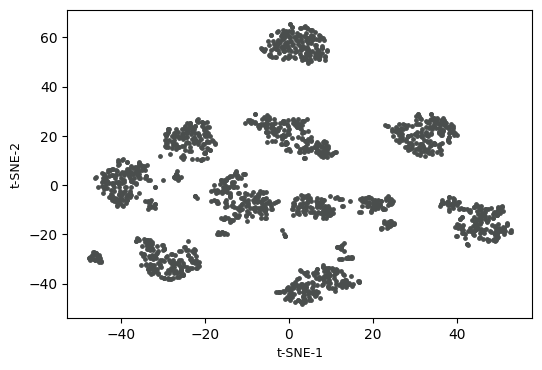

In [4]:
from bioinfokit.visuz import cluster
cluster.tsneplot(score=tsne_em, show=True)

## Add colors to the clusters
This will help to color and visualize clusters of similar data points. Get a list of categories.

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


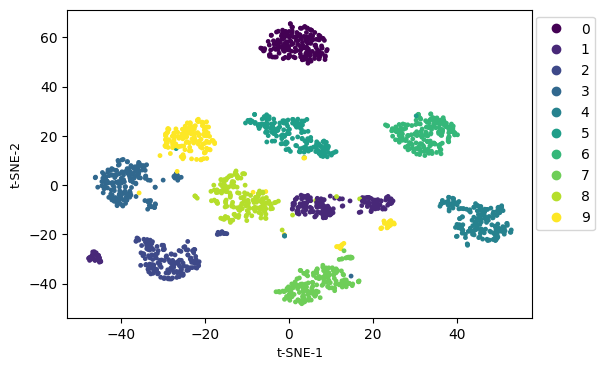

In [5]:
color_class = df['class'].to_numpy()
cluster.tsneplot(score=tsne_em, colorlist=color_class, legendpos='upper right', legendanchor=(1.15, 1), show=True )

## Interpretation
The points within the individual clusters are very similar to each other and are less similar to points in other clusters. A similar pattern likely is present in the original, high-dimensional data set. 

In the context of scRNA-seq, for example, these clusters would represent the cell types with similar transcriptional profiles.

## NOTES:

- t-SNE is a stochastic method and produces slightly different embeddings if run multiple times. These different results could affect the numeric values on the axis but do not affect the clustering of the points. 


- t-SNE has a parameter called perplexity that measures the effective number of neighbors and controls the trade-off between global high-dimensional and local low-dimensional space. We can tune the perplexity parameter to influence the structure of the clusters and how they are displayed.

<div class="alert alert-block alert-warning">
<b>Tip: </b>t-SNE is computationally expensive and can take several hours on large datasets. PCA is much faster and can be run before running t-SNE to reduce the number of original variables.</div>



---



# 🌟 Ready for the next one?
<br>

- [**Lesson 11: UMAP**](Lesson_11_UMAP.ipynb)
</br>

---

# Contributions & acknowledgment

Thanks Antony Ross for contributing the content for this notebook.

---

Copyright (c) 2022 Stanford Data Ocean (SDO)

All rights reserved.